<a href="https://colab.research.google.com/github/t-abs/Machine-Learning/blob/main/PCA_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/sample_data/diabetes (1).csv")
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

1.Checking the standard normal form


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.drop(columns=['Outcome'],axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)


In [8]:
dataScaled = pd.DataFrame(dataScaled)
dataScaled.head()

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [9]:
dataScaled.describe()

,0,1,2,3,4,5,6,7,8
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [10]:
dataScaled.shape

(768, 9)

2.Covariance Matrix

In [12]:
CovarianceMatrix=dataScaled.T @dataScaled/767
CovarianceMatrix

,0,1,2,3,4,5,6,7,8
0,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051,0.222187
1,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858,0.467190
2,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840,0.065153
3,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119,0.074850
4,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218,0.130718
5,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289,0.293076
6,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605,0.174071
7,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304,0.238667
8,0.222187,0.467190,0.065153,0.074850,0.130718,0.293076,0.174071,0.238667,1.001304


3.Calculate the eigen values and eigen vector

In [14]:
eigenValues,eigenVectors=np.linalg.eig(CovarianceMatrix)

In [15]:
#eigenvalues=no of features
eigenValues

array([2.35556873, 1.77662535, 1.12168566, 0.38541202, 0.41872635,
       0.4890602 , 0.73582635, 0.88310476, 0.84572462])

In [16]:
eigenVectors

array([[ 0.21599835,  0.52744611,  0.16451225,  0.26505155, -0.54064221,
         0.07851795, -0.4567731 , -0.16088274,  0.21176571],
       [ 0.43675677,  0.09563451, -0.39141738,  0.58107579,  0.02524536,
        -0.20799965,  0.38274945,  0.32712336,  0.10877916],
       [ 0.30045538,  0.04625339,  0.62970532, -0.06830645, -0.16280013,
         0.32670833,  0.6078671 , -0.01105718, -0.05937792],
       [ 0.30729203, -0.44839783,  0.29432599,  0.39477039,  0.43491377,
         0.28199843, -0.39795678, -0.07401586,  0.1718095 ],
       [ 0.33633235, -0.35534569, -0.14165347, -0.47845101, -0.26883758,
        -0.08221649, -0.00873019,  0.09763514,  0.65037442],
       [ 0.39734198, -0.21031643,  0.2519303 , -0.12644026, -0.16646311,
        -0.57252374, -0.24100789,  0.16321892, -0.52745778],
       [ 0.23763447, -0.17519467, -0.2853247 ,  0.04961786, -0.09316407,
        -0.05719014,  0.17162837, -0.87352658, -0.15655457],
       [ 0.27865556,  0.53320237,  0.1261179 , -0.28875418,  0

In [17]:
## PC1 data
PC1_data = dataScaled @ eigenVectors[:, 0]
PC1_data

0      1.756947
1     -1.507421
2      0.650822
3     -1.587398
4      2.483374
         ...   
763    1.283069
764   -0.502281
765   -0.574088
766   -0.172699
767   -1.321267
Length: 768, dtype: float64

In [18]:
##PC2 Data
PC2_data=dataScaled @ eigenVectors[:,1]
PC2_data

0      1.111743
1     -0.559406
2      1.929576
3     -1.065075
4     -2.359563
         ...   
763    1.211187
764   -0.674135
765    0.033816
766    1.322892
767   -1.027489
Length: 768, dtype: float64

PCA Implementation via the sklearn library

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(dataScaled)

array([[-1.75694707, -1.11174258],
       [ 1.50742148,  0.55940565],
       [-0.65082201, -1.92957633],
       ...,
       [ 0.57408846, -0.03381634],
       [ 0.17269908, -1.32289215],
       [ 1.32126715,  1.02748861]])

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponent = pca.fit_transform(dataScaled)

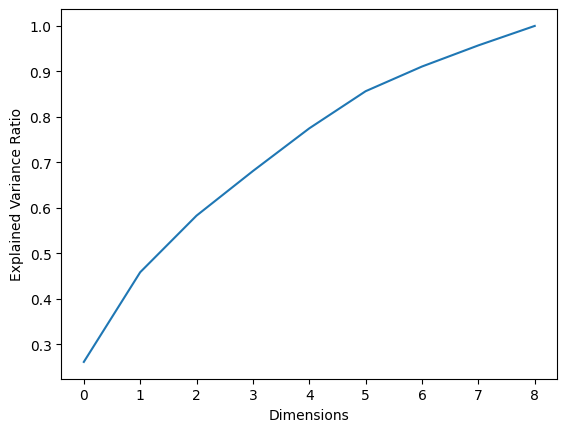

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.savefig("ScreenPlot.png")
plt.show()